In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
data = pd.read_csv('C:/Users/dilshan/Documents/AI_ML_Course(zuu)/week03/zuu_crew_scores.csv')
X = data['Attendance'].values
y = data['CapstoneScore'].values

In [14]:
def train_test_split_custom(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_size = int(len(X) * test_size)
    test_idx = indices[:test_size]
    train_idx = indices[test_size:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_custom(X, y)

In [15]:
def create_polynomial_features(X, degree):
    X_poly = np.ones((len(X), degree + 1))
    for d in range(1, degree + 1):
        X_poly[:, d] = X ** d
    return X_poly

In [16]:
def compute_cost_poly(X_poly, y, theta):
    m = len(y)
    y_hat = X_poly @ theta
    cost = (1 / (2 * m)) * np.sum((y_hat - y)**2)
    return cost

def compute_gradients_poly(X_poly, y, theta):
    m = len(y)
    y_hat = X_poly @ theta
    gradients = (1 / m) * (X_poly.T @ (y_hat - y))
    return gradients

def gradient_descent_poly(X_poly, y, learning_rate, max_iters=10000, tol=1e-6):
    theta = np.zeros(X_poly.shape[1])
    costs = []
    for i in range(max_iters):
        grads = compute_gradients_poly(X_poly, y, theta)
        theta -= learning_rate * grads
        cost = compute_cost_poly(X_poly, y, theta)
        costs.append(cost)
        if i > 0 and abs(costs[-1] - costs[-2]) < tol:
            break
    return theta, costs

def predict_poly(X_poly, theta):
    return X_poly @ theta

In [17]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)


Testing degree: 1
Final theta: [40.47216972  2.16193603]
Train metrics: {'MSE': np.float64(1156.3814088131878), 'MAE': np.float64(26.13940493985899), 'RMSE': np.float64(34.00560849055914), 'R2': np.float64(-0.8901339168099647)}
Test metrics: {'MSE': np.float64(763.3250700055921), 'MAE': np.float64(18.836439505097722), 'RMSE': np.float64(27.62833816945189), 'R2': np.float64(-0.4345728469361081)}


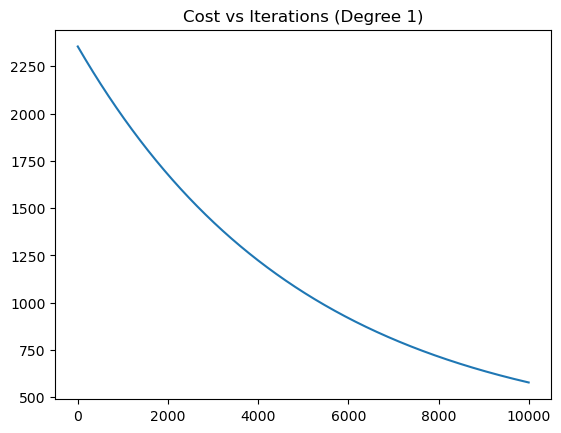

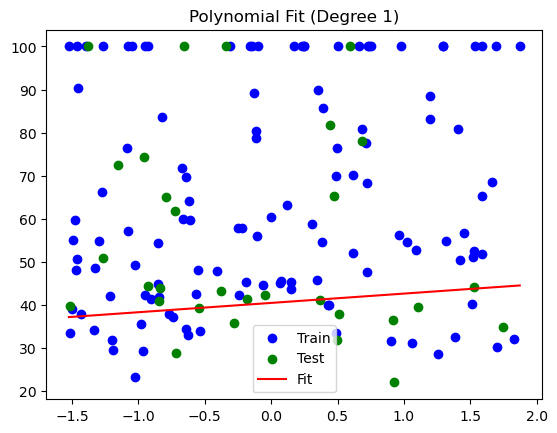


Testing degree: 2
Final theta: [30.79977     0.72726625 18.41883335]
Train metrics: {'MSE': np.float64(1137.8770005775489), 'MAE': np.float64(27.461554549374007), 'RMSE': np.float64(33.73243247347497), 'R2': np.float64(-0.8598880054263021)}
Test metrics: {'MSE': np.float64(885.330372869875), 'MAE': np.float64(22.52239876053448), 'RMSE': np.float64(29.75450172444289), 'R2': np.float64(-0.6638663701660397)}


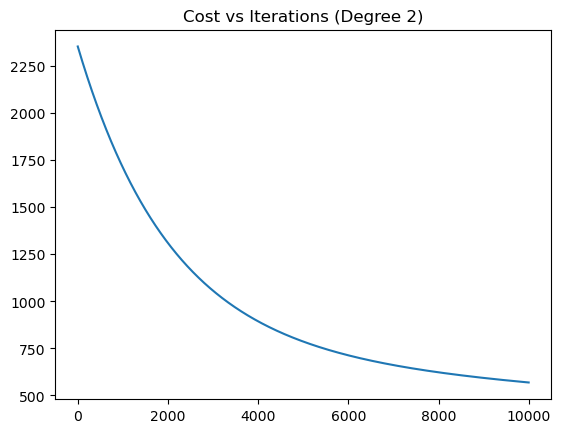

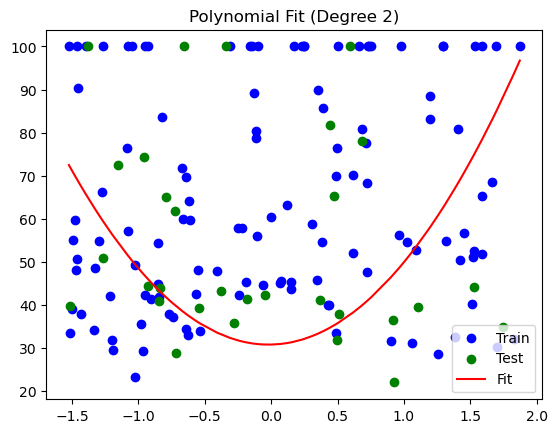


Testing degree: 3
Final theta: [30.84172825  0.53639176 18.42608411 -0.73975111]
Train metrics: {'MSE': np.float64(1131.8568559338823), 'MAE': np.float64(27.484159671249845), 'RMSE': np.float64(33.64308035739121), 'R2': np.float64(-0.8500479306132918)}
Test metrics: {'MSE': np.float64(860.9005287254242), 'MAE': np.float64(22.204539775574112), 'RMSE': np.float64(29.341106467299834), 'R2': np.float64(-0.6179535704406838)}


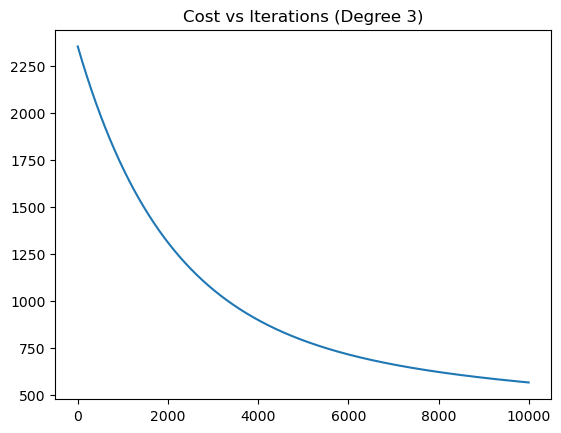

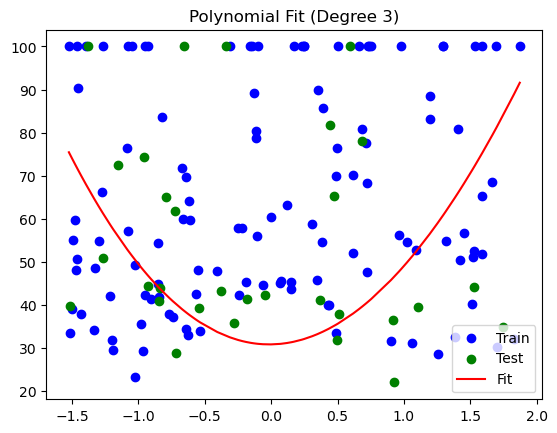

In [18]:
degrees = [1, 2, 3]
alpha = 0.0001  
results_poly = {}

# Standardize X_train and X_test manually
X_mean = np.mean(X_train)
X_std = np.std(X_train)
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

for degree in degrees:
    print(f"\nTesting degree: {degree}")
    X_train_poly = create_polynomial_features(X_train_scaled, degree)
    X_test_poly = create_polynomial_features(X_test_scaled, degree)
    
    theta, costs = gradient_descent_poly(X_train_poly, y_train, alpha)
    print(f"Final theta: {theta}")
    
    y_pred_train = predict_poly(X_train_poly, theta)
    y_pred_test = predict_poly(X_test_poly, theta)
    
    metrics_train = {
        'MSE': mse(y_train, y_pred_train),
        'MAE': mae(y_train, y_pred_train),
        'RMSE': rmse(y_train, y_pred_train),
        'R2': r2_score(y_train, y_pred_train)
    }
    metrics_test = {
        'MSE': mse(y_test, y_pred_test),
        'MAE': mae(y_test, y_pred_test),
        'RMSE': rmse(y_test, y_pred_test),
        'R2': r2_score(y_test, y_pred_test)
    }
    print("Train metrics:", metrics_train)
    print("Test metrics:", metrics_test)
    
    results_poly[degree] = {'theta': theta, 'costs': costs, 'metrics_train': metrics_train, 'metrics_test': metrics_test}
    
    # Convergence plot
    plt.figure()
    plt.plot(costs)
    plt.title(f'Cost vs Iterations (Degree {degree})')
    plt.show()
    
    # Prediction plot (sort for line)
    sort_idx = np.argsort(X_train_scaled)
    plt.figure()
    plt.scatter(X_train_scaled, y_train, color='blue', label='Train')
    plt.scatter(X_test_scaled, y_test, color='green', label='Test')
    plt.plot(X_train_scaled[sort_idx], y_pred_train[sort_idx], color='red', label='Fit')
    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()